In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

import sys
sys.path.append("../../")

# Package for importing image representation
from PIL import Image, ImageOps

# from src.V1_reconst import generate_Y, reconstruct
import pandas as pd
import seaborn as sns
import time
import os.path
from src.compress_sensing_library import fig_save_path

# Setup

In [3]:
img_nm = 'tree_part1'
load_V1 = '../../result/dwt/{img}/V1/param_db2_Mon_Apr_24_13_52_32_2023.csv'.format(img = img_nm)
load_pixel = '../../result/dwt/{img}/pixel/param_db2_Mon_Apr_24_12_36_36_2023.csv'.format(img = img_nm)
load_gaussian = '../../result/dwt/{img}/gaussian/param_db2_Mon_Apr_24_12_37_23_2023.csv'.format(img = img_nm)
directory = "num_cell_vs_error"

## Process V1 data

In [4]:
V1_param_df = pd.read_csv(load_V1)

for index in V1_param_df.columns:
    if (index == 'Unnamed: 0') :
        V1_param_df.drop('Unnamed: 0', axis = 1, inplace=True)

In [5]:
V1_param_mean_df = V1_param_df.groupby(
    ['num_cell', 'sparse_freq', 'cell_size', 'alp', 'lv'], as_index=False).mean().drop('rep', axis=1) 

V1_param_min_df = V1_param_mean_df.sort_values('error').drop_duplicates('num_cell')
V1_param_min_df = V1_param_min_df.rename(columns={'error': 'min_error'})
V1_merged_df = pd.merge(V1_param_df, V1_param_min_df, 
                               on=['num_cell', 'sparse_freq', 'cell_size', 'alp', 'lv'], how='left')
V1_plotting_data = V1_merged_df.loc[V1_merged_df['min_error'].notnull()]

In [6]:
#V1 Data processing
V1_min_mean_err_df = pd.DataFrame()
for i in V1_param_mean_df['num_cell'].unique():
    V1_temp = V1_param_mean_df.loc[V1_param_mean_df['num_cell'] == i]
    #hyperparameter for each number of cell
    ## Grabbing values by each values
    V1_min_mean_err_df = V1_min_mean_err_df.append(V1_temp.loc[V1_temp['error'] == V1_temp['error'].min()])
    
# Merge two data to extract
V1_min_mean_err_df = V1_min_mean_err_df.rename(columns={'error' : 'mean_err'})
V1_merged_df = pd.merge(V1_param_df, V1_min_mean_err_df, on = ['num_cell', 'sparse_freq', 'cell_size', 'alp', 'lv'], how = 'left')
V1_plotting_data = V1_merged_df.loc[V1_merged_df['mean_err'].notnull()]


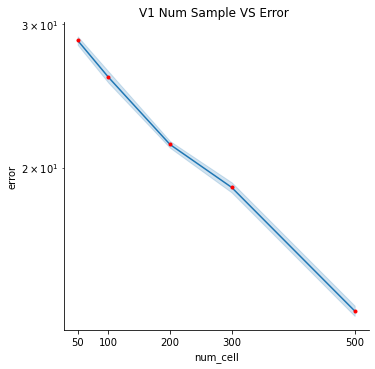

In [7]:
V1_fig = sns.relplot(data = V1_plotting_data, x = 'num_cell', y = 'error', kind= 'line')
V1_fig.set(yscale='log')
plt.plot(V1_param_min_df['num_cell'].unique(), V1_param_min_df['min_error'], 'r.')
title = 'V1_Num_Sample_VS_Error_'
plt.title(title.replace('_', ' '))
plt.xticks(V1_param_df['num_cell'].unique())


# Saving
fig_path = fig_save_path(img_nm, 'dwt', 'V1/{directory}'.format(directory = directory), title + "_".join(
    str.split(time.ctime().replace(":", "_"))))
plt.savefig(fig_path, dpi = 200)

plt.show()

## Process pixel Data

In [11]:
pixel_param_df = pd.read_csv(load_pixel)
for index in pixel_param_df.columns:
    if (index == 'Unnamed: 0') :
        pixel_param_df.drop('Unnamed: 0', axis = 1, inplace=True)

In [12]:
pixel_param_mean_df = pixel_param_df.groupby(
    ['alp', 'num_cell', 'lv'], as_index=False).mean().drop('rep', axis=1) 

pixel_param_min_df = pixel_param_mean_df.sort_values('error').drop_duplicates('num_cell')
pixel_param_min_df = pixel_param_min_df.rename(columns={'error': 'min_error'})
pixel_merged_df = pd.merge(pixel_param_df, pixel_param_min_df, 
                               on=['alp', 'num_cell', 'lv'], how='left')
pixel_plotting_data = pixel_merged_df.loc[pixel_merged_df['min_error'].notnull()]

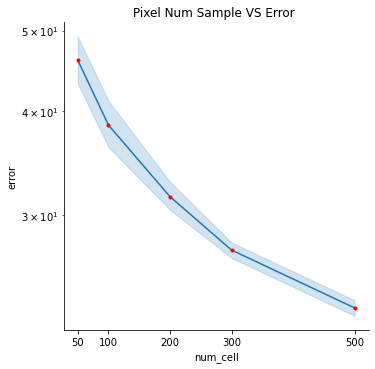

In [14]:
pixel_fig = sns.relplot(data = pixel_plotting_data, x = 'num_cell', y = 'error', kind= 'line')
pixel_fig.set(yscale='log')
plt.plot(pixel_param_min_df['num_cell'].unique(), pixel_param_min_df['min_error'], 'r.')
title = 'Pixel_Num_Sample_VS_Error_'
plt.title(title.replace('_', ' '))
plt.xticks(pixel_param_df['num_cell'].unique())
plt.show()

# fig_path = fig_save_path(img_nm, 'dwt', 'pixel/{directory}'.format(directory = directory), title + "_".join(
#     str.split(time.ctime().replace(":", "_"))))
# pixel_fig.savefig(fig_path, dpi = 200)

## Load gaussian

In [16]:
gaussian_param_df = pd.read_csv(load_gaussian)
for index in gaussian_param_df.columns:
    if (index == 'Unnamed: 0') :
        gaussian_param_df.drop('Unnamed: 0', axis = 1, inplace=True)

In [17]:
gaussian_param_mean_df = gaussian_param_df.groupby(
    ['alp', 'num_cell', 'lv'], as_index=False).mean().drop('rep', axis=1) 

gaussian_param_min_df = gaussian_param_mean_df.sort_values('error').drop_duplicates('num_cell')
gaussian_param_min_df = gaussian_param_min_df.rename(columns={'error': 'min_error'})
gaussian_merged_df = pd.merge(gaussian_param_df, gaussian_param_min_df, 
                               on=['alp', 'num_cell', 'lv'], how='left')
gaussian_plotting_data = gaussian_merged_df.loc[gaussian_merged_df['min_error'].notnull()]

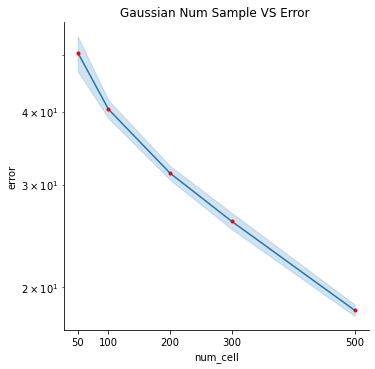

In [18]:
# save_path = '../../figures/dct/{directory}/{img}/gaussian/'.format(directory = directory, img = img_nm)

gaussian_fig = sns.relplot(data = gaussian_plotting_data, x = 'num_cell', y = 'error', kind= 'line')
gaussian_fig.set(yscale='log')
plt.plot(gaussian_param_min_df['num_cell'].unique(), gaussian_param_min_df['min_error'], 'r.')
title = 'Gaussian_Num_Sample_VS_Error_'
plt.title(title.replace('_', ' '))
plt.xticks(gaussian_param_df['num_cell'].unique())

fig_path = fig_save_path(img_nm, 'dwt', 'gaussian/{directory}'.format(directory = directory), title + "_".join(
    str.split(time.ctime().replace(":", "_"))))
plt.savefig(fig_path, dpi = 200)

plt.show()

# for saving


## V1 Vs Pixel Vs Gaussian

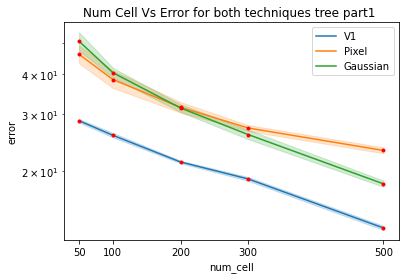

In [19]:
V1_err = sns.lineplot(data = V1_plotting_data, x = 'num_cell', y = 'error', palette='Accent', legend = False)
pixel_err = sns.lineplot(data = pixel_plotting_data, x = 'num_cell', y = 'error')
gaussian_err = sns.lineplot(data = gaussian_plotting_data, x = 'num_cell', y = 'error')
plt.yscale('log')
plt.xticks(V1_param_min_df['num_cell'])
plt.plot(V1_param_min_df['num_cell'], V1_param_min_df['min_error'], 'r.') # for V1 numcell location
plt.plot(pixel_param_min_df['num_cell'].unique(), pixel_param_min_df['min_error'], 'r.') #For pixel samp location
plt.plot(gaussian_param_min_df['num_cell'].unique(), gaussian_param_min_df['min_error'], 'r.')
plt.xlabel('num_cell')
title = "Num_Cell_Vs_Error_for_both_techniques_{img}_".format(img = img_nm)
plt.title(title.replace('_', ' '))
plt.legend(['V1', 'Pixel', 'Gaussian'], loc = 'best')
# plt.show()

fig_path = fig_save_path('tree_part1', 'dwt', 'combined', 'NumCell_Error_' + "_".join(
    str.split(time.ctime().replace(":", "_"))))
plt.savefig(fig_path, dpi = 200)